## Klasifikacija malignog i benignog raka dojke koristeći algoritme strojnog učenja - vizualizacija skupa podataka

Skup podataka preuzet s https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/ (wbdc.data)

In [537]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as pp

# Path: main.ipynb

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df_initial = pd.read_csv('data.csv')

In [538]:
df_initial.shape

(569, 32)

Inicijalni skup podataka sadrži 569 primjeraka s po 33 atributa

In [539]:
df_initial.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [540]:
df_initial.columns.values

array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

#### Normalizacija imena varijabli

In [541]:
df_initial.rename(columns={'concave points_worst': 'concave_points_worst', 'concave points_mean': 'concave_points_mean', 'concave points_se': 'concave_points_se'}, inplace=True)

#### Pojašnjenja značajki:
  - **diagnosis** - skupina karcinoma kojoj primjerak pripada - M za maligni, B za benigni (u nastavku 1 za maligni, a 0 za benigni)
  - Za svaki primjerak, za svaku stanicu raka izračunata su sljedeća svojstva, te je zabilježena srednja vrijednost, standardna pogreška i prosjek tri najveće vrijednosti gledajući sve uzorke:
    - **radius** - srednja vrijednost udaljenosti ruba stanice od središta
    - **texture** - standardna devijacija sivih vrijednosti
    - **perimeter** - opseg stanice
    - **area** - površina stanice
    - **smoothness** - lokalna varijaciji u duljini radijusa
    - **compactness** - $opseg^{2}/površina - 1.0$
    - **concavity** - izraženost konkavnih dijelova konture stanice
    - **concave_points** - broj konkavnih dijelova na konturi stanice
    - **symmetry**
    - **fractal_dimension** - $aproksimacija\_obale - 1$
Sve vrijednosti zabilježene su pomoću četiri značajne znamenke
  

In [542]:
df_initial.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave_points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%    

In [543]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [544]:
df_initial.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave_points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave_points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave_points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

S obzirom na to da su vrijednosti svih atributa osim _id_ i _diagnosis_ realni brojevi (i to rezultati mjerenja), bilo je očekivano da su to pretežito jedinstvene vrijednosti. Za razliku od tih atributa, atribut _id_ je jedinstven za svaki primjerak i ne nosi nikakvu informaciju koja pridonosi klasifikaciji primjerka, pa ga možemo izbaciti.

In [545]:
df = df_initial.copy()
df.drop(['id'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Regularizacija tipova podataka

Radi lakše klasifikacije, tesktualni tip podataka atributa _diagnosis_ potrebno je pretvoriti u binarni $\newline$
$B \rightarrow 0$, $M \rightarrow 1$

In [546]:
le = pp.LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Nedostajući podatci

In [547]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

U skupu nema nedostajućih podataka, što je i navedeno na izvoru odakle je skup podataka preuzet

### Stršeći podatci

In [548]:
df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave_points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.72

Iz pregleda kvartila može se okvirno odrediti potencijalne kandidate za atribute za koje neki primjerci sadrže stršeće podatke. $\newline$ Kao kandidati za detaljniju analizu uzimani su atributi čija je maksimalna vrijednost više od dva puta veća od trećeg kvartila. Za takve atribute, vizualizirana je distribucija korištenjem kutijastog dijagrama te su granice stršećih podataka vizualno određene.

In [549]:
def check_outliers(df, col):
    negatives = df[df['diagnosis'] == 0].reset_index(drop=True)
    positives = df[df['diagnosis'] == 1].reset_index(drop=True)
    sns.boxplot(x="diagnosis", y=col, data=df)
    plt.show()

def deal_with_outliers(df, col, limit0, limit1, method=None):
    if method == 'drop':
        df.drop(df[(df['diagnosis'] == 0) & (df[col] > limit0)].index, inplace=True)
        df.drop(df[(df['diagnosis'] == 1) & (df[col] > limit1)].index, inplace=True)
    elif method == 'replace':
        negatives = df[df['diagnosis'] == 0].reset_index(drop=True)
        positives = df[df['diagnosis'] == 1].reset_index(drop=True)
        df.loc[(df['diagnosis'] == 0) & (df[col] > limit0), col] = negatives[col].mean()
        df.loc[(df['diagnosis'] == 1) & (df[col] > limit1), col] = positives[col].mean()
    else:  
        return
    df.reset_index(drop=True, inplace=True)
preffered_method = 'drop'

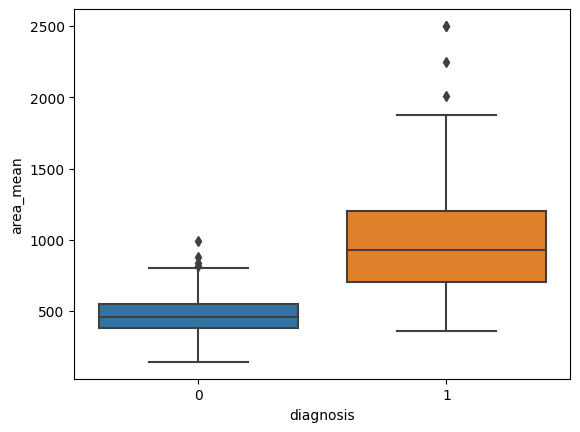

0


In [550]:
check_outliers(df, 'area_mean')
print((df.radius_se > 1500).sum())
deal_with_outliers(df, 'area_mean', 900, None, preffered_method)

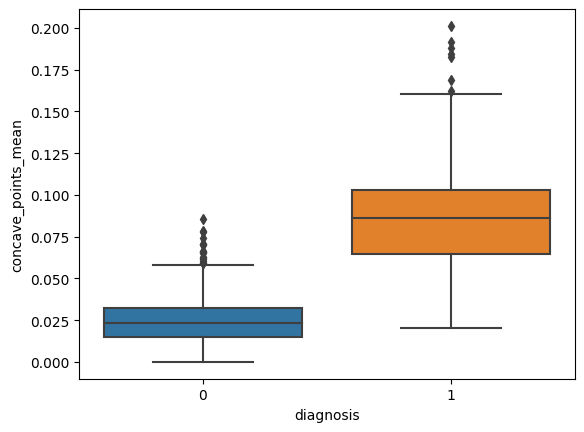

In [551]:
check_outliers(df, 'concave_points_mean')
deal_with_outliers(df, 'concave_points_mean', 0.07, None, preffered_method)

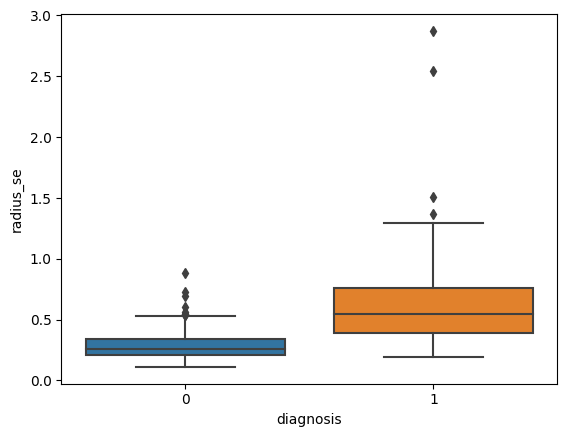

In [552]:
check_outliers(df, 'radius_se')
deal_with_outliers(df, 'radius_se', 0.6, None, preffered_method)

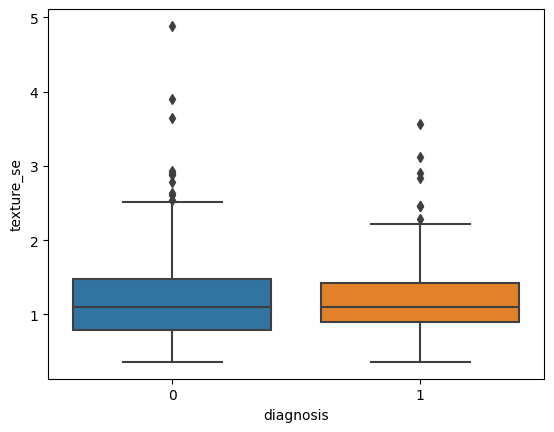

5


In [553]:
check_outliers(df, 'texture_se')
print((df.texture_se > 3).sum())
deal_with_outliers(df, 'texture_se', 3, 3, preffered_method)

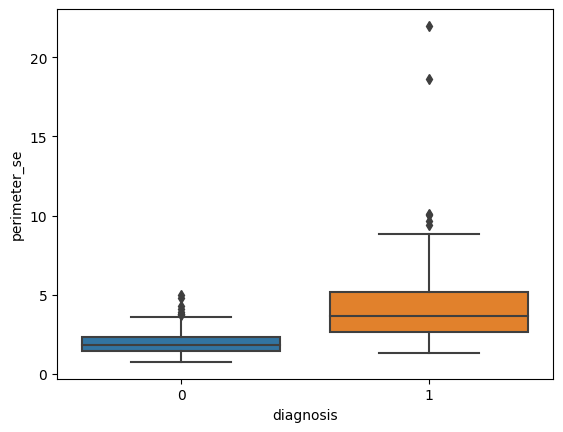

6


In [554]:
check_outliers(df, 'perimeter_se')
print((df.perimeter_se > 9).sum())
deal_with_outliers(df, 'perimeter_se', 4, None, preffered_method)

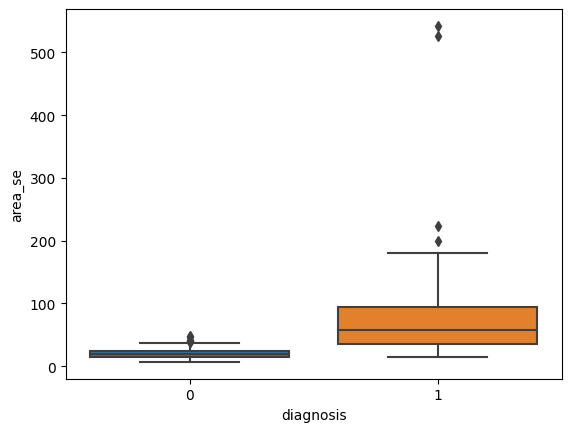

13


In [555]:
check_outliers(df, 'area_se')
print((df.area_se > 150).sum())
deal_with_outliers(df, 'area_se', 40, 300, preffered_method)

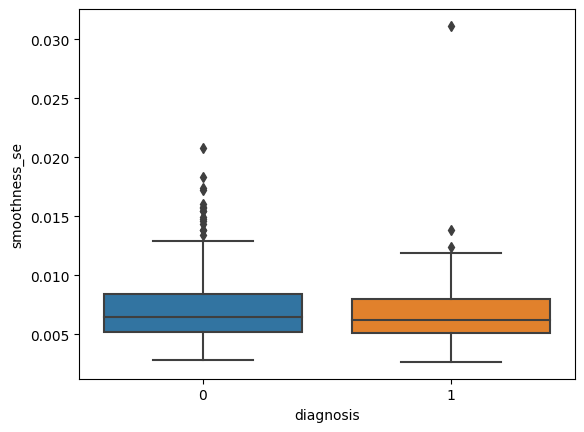

5


In [556]:
check_outliers(df, 'smoothness_se')
print((df.smoothness_se > 0.017).sum())
deal_with_outliers(df, 'smoothness_se', 0.02, 0.02, preffered_method)

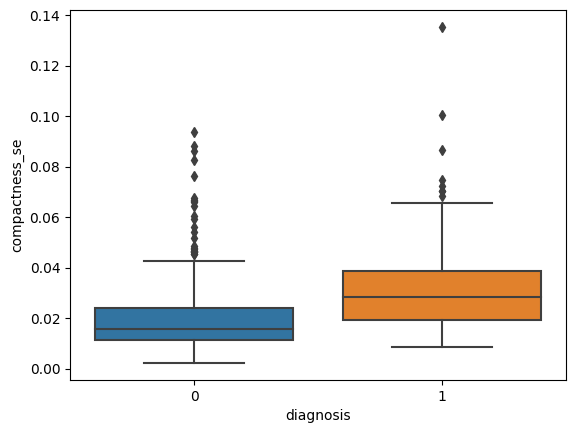

2


In [557]:
check_outliers(df, 'compactness_se')
print((df.compactness_se > 0.1).sum())
deal_with_outliers(df, 'compactness_se', 0.08, 0.08, preffered_method)

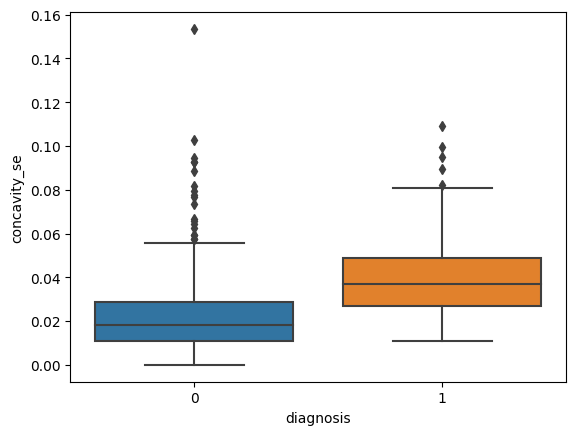

1


In [558]:
check_outliers(df, 'concavity_se')
print((df.concavity_se > 0.15).sum())
deal_with_outliers(df, 'concavity_se', 0.12, 0.12, preffered_method)

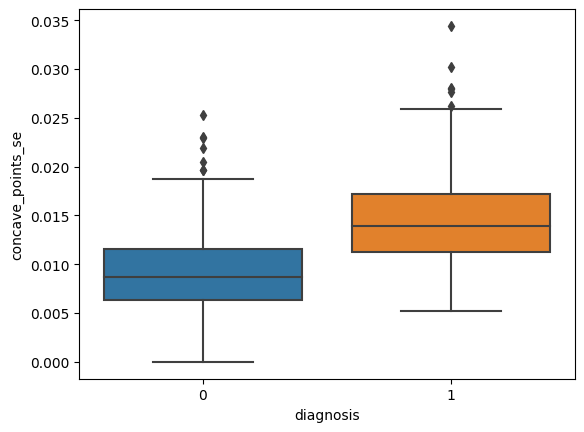

2


In [559]:
check_outliers(df, 'concave_points_se')
print((df.concave_points_se > 0.03).sum())
deal_with_outliers(df, 'concave_points_se', 0.022, None, preffered_method)

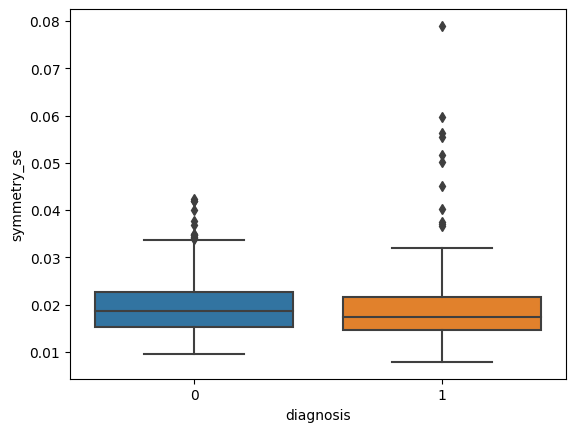

6


In [560]:
check_outliers(df, 'symmetry_se')
print((df.symmetry_se > 0.05).sum())
# deal_with_outliers(df, 'symmetry_se', 0.05, preffered_method)

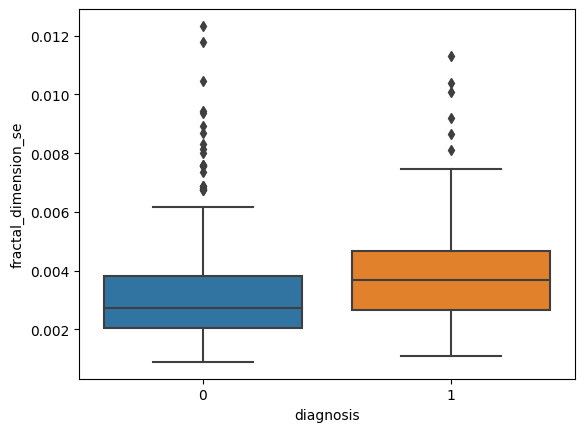

1


In [561]:
check_outliers(df, 'fractal_dimension_se')
print((df.fractal_dimension_se > 0.012).sum())
deal_with_outliers(df, 'fractal_dimension_se', 0.01, 0.01, preffered_method)

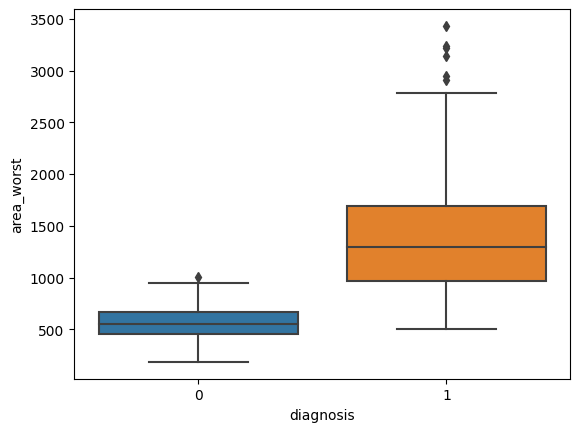

17


In [562]:
check_outliers(df, 'area_worst')
print((df.area_worst > 2200).sum())
# deal_with_outliers(df, 'area_worst', 2200, preffered_method)

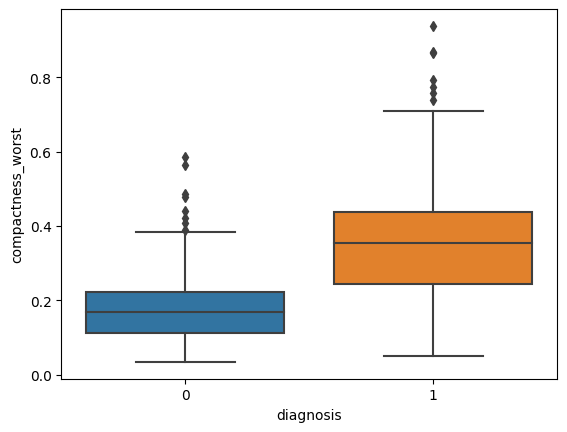

3


In [563]:
check_outliers(df, 'compactness_worst')
print((df.compactness_worst > 0.8).sum())
deal_with_outliers(df, 'compactness_worst', 0.5, None, preffered_method)

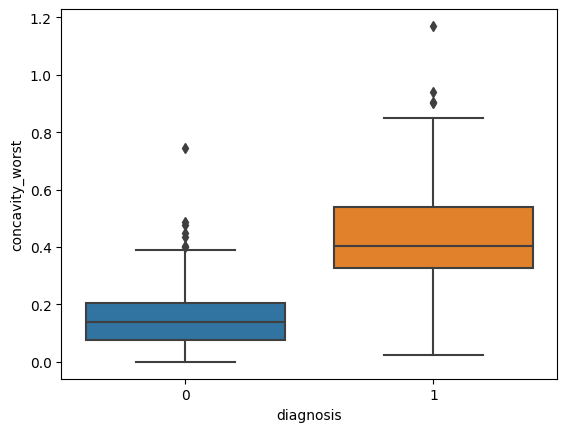

1


In [564]:
check_outliers(df, 'concavity_worst')
print((df.concavity_worst > 1.0).sum())
deal_with_outliers(df, 'concavity_worst', 0.5, None, preffered_method)

Nakon izbacivanja stršećih podataka, od inicijalnih 569 primjeraka, preostali broj primjeraka je:

In [565]:
len(df)

522

## Vizualizacija skupa podataka

In [566]:
df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  522.000000   522.000000    522.000000      522.000000   522.000000   
mean     0.385057    14.162826     19.279425       92.088429   655.135632   
std      0.487076     3.393978      4.287893       23.369932   333.175635   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.750000     16.187500       75.517500   426.175000   
50%      0.000000    13.435000     18.825000       86.755000   555.900000   
75%      1.000000    15.832500     21.807500      104.250000   787.050000   
max      1.000000    27.220000     39.280000      182.100000  2250.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       522.000000        522.000000      522.000000           522.000000   
mean          0.096040          0.100937        0.083595             0.047817   
std           0.013474          0.050072        0.073833             0.037782   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086130          0.063128        0.028535             0.019682   
50%           0.095785          0.089405        0.058105             0.032635   
75%           0.104900          0.127800        0.119900             0.073580   
max           0.142500          0.345400        0.375400             0.191300   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     522.000000              522.000000  522.000000  522.000000   
mean        0.179890                0.062121    0.386634    1.160497   
std         0.025998                0.006107    0.235495    0.469084   
min         0.116700                0.049960    0.114400    0.360200   
25%         0.161725                0.057633    0.227150    0.823100   
50%         0.178300                0.061285    0.311150    1.067500   
75%         0.194300                0.065683    0.450100    1.420500   
max         0.304000                0.097440    1.370000    2.927000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    522.000000  522.000000     522.000000      522.000000    522.000000   
mean       2.709126   37.937318       0.006771        0.022750      0.027894   
std        1.659694   34.085685       0.002449        0.013111      0.018328   
min        0.757000    6.802000       0.002667        0.002252      0.000000   
25%        1.566000   17.725000       0.005080        0.012600      0.014580   
50%        2.205000   23.920000       0.006192        0.019545      0.023975   
75%        3.179000   43.882500       0.007992        0.030530      0.038720   
max       10.120000  224.100000       0.017360        0.074580      0.109100   

       concave_points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         522.000000   522.000000            522.000000    522.000000   
mean            0.011109     0.019818              0.003368     16.355688   
std             0.005075     0.007510              0.001569      4.735940   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007508     0.014925              0.002205     13.070000   
50%             0.010510     0.018435              0.002996     14.985000   
75%             0.013915     0.022433              0.004203     19.047500   
max             0.034410     0.078950              0.009423     33.130000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     522.000000       522.000000   522.000000        522.000000   
mean       25.797816       107.629387   886.061686          0.132944   
std         6.097017        32.752776   552.158458          0.022293   
min        12.020000        50.410000   185.200000          0.081250   
25%        21.382500        84.492500   520.700000          0.117125   
50%        25.480000        97.930000   688.750000          0.132250   
75%        30.00

0    321
1    201
Name: diagnosis, dtype: int64


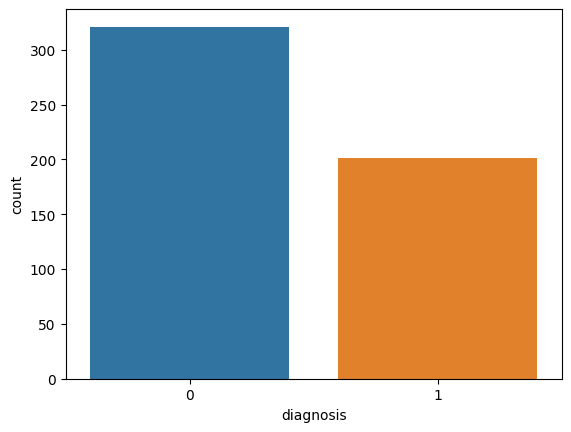

In [567]:
sns.countplot(df, x='diagnosis')
print(df.diagnosis.value_counts())

Skup podataka očito je nebalansiran, s približno dva puta više primjeraka benignih tumora

### Ispitivanje korelacije
Sljedeća korisna stvar je izračunati korelaciju pojedinih atributa (zbog velikog broja atributa, anotacije s brojčanom vrijednosti korelacije zaokružene su na jedno decimalno mjesto):

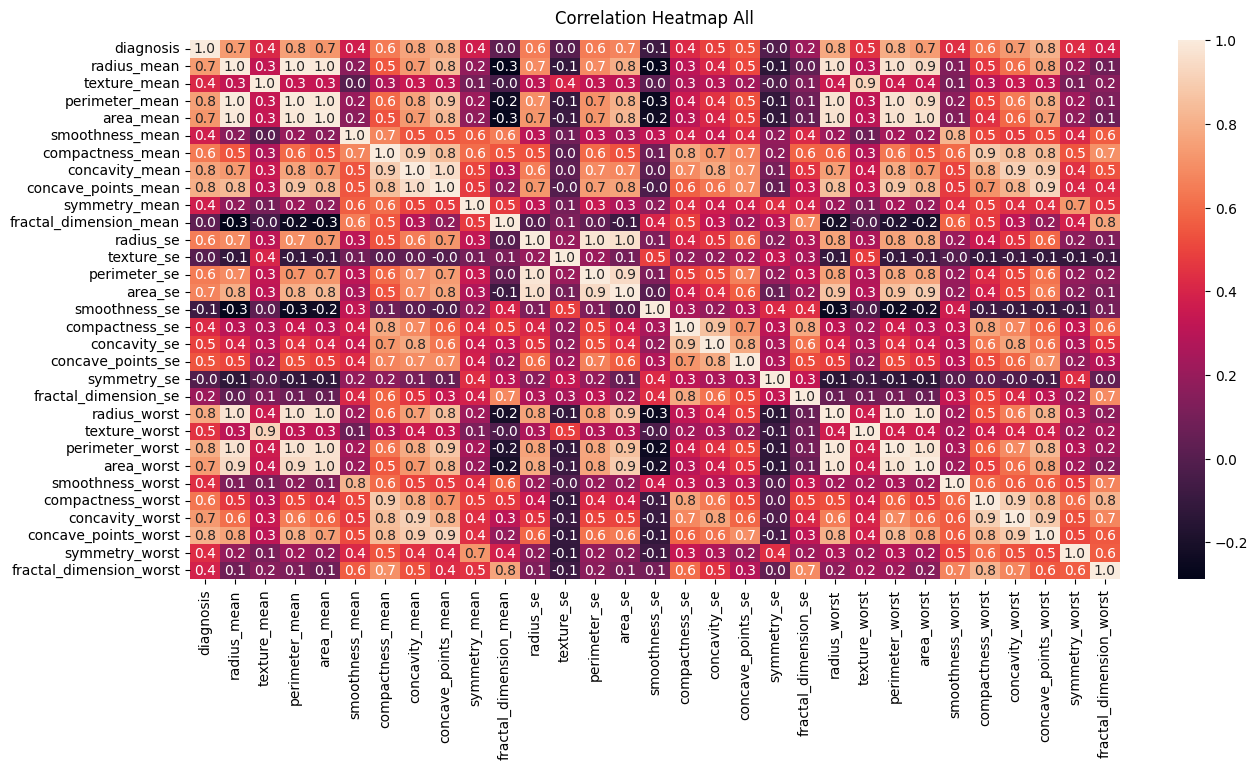

In [568]:
heatmap = sns.heatmap(df.corr(), xticklabels=True, yticklabels=True, annot=True, fmt='.1f')
heatmap.set_title('Correlation Heatmap All', fontdict={'fontsize': 12}, pad=12)
heatmap.figure.set_size_inches(15, 7)


Veličina _diagnosis_ (koju ćemo pokušavati predvidjeti pomoću ostalih atributa) visoko je korelirana s veličinama _radius_, _perimeter_, _area_, _compactness_, _concavity_ i _concave\_points_ i to primarno u grupama atributa _mean_ i _worst_. Ti atributi bit će primarni kandidati za treniranje algoritma strojnog učenja.

Text(0.5, 1.0, 'Correlation radius-perimeter-area')

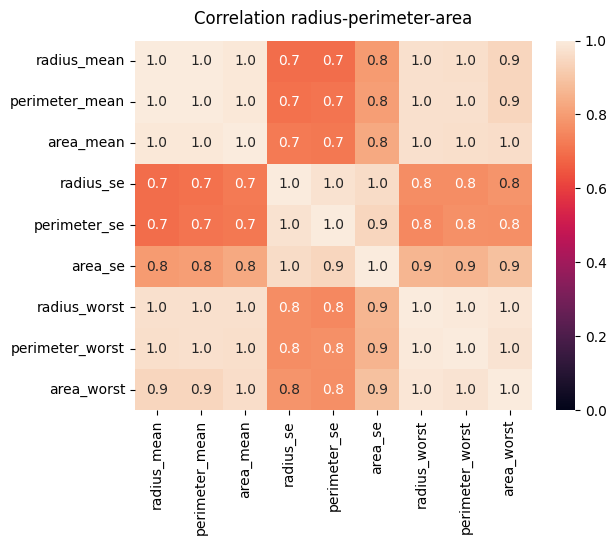

In [569]:
heatmap = sns.heatmap(df.filter(regex="radius.*|perimeter.*|area.*").corr(), xticklabels=True, yticklabels=True, annot=True, fmt='.1f', vmin=0, vmax=1)
heatmap.set_title('Correlation radius-perimeter-area', fontdict={'fontsize':12}, pad=12)

Vidljiva je gotovo savršena korelacija atributa _radius\_mean_, _perimeter\_mean_ i _area\_mean_ (gornji lijevi kut), što je i očekivano, s obzirom na to da su slike stanica kružnog oblika i opseg i površina direktno ovise o radijusu stanice. Analogno, korelacija je prisutna za iste tri veličine i unutar grupe _worst_ (donji desni kut), te je korelacija za te tri veličine prisutna i između grupa _mean_ i _worst_ (krajevi sporedne dijagonale). $\newline$
Slično, atributi _radius\_se_, _perimeter\_se_ i _area\_se_ korelirani su međusobno (sredina dijagrama), ali značajno manje s tim veličinama iz preostale dvije grupe (_mean_ i _worst_). $\newline$ 

Text(0.5, 1.0, 'Correlation compactness-concavity-concave_points')

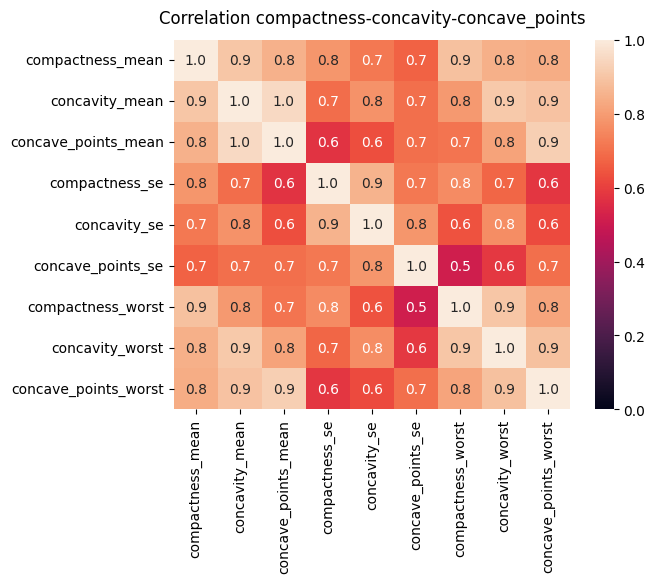

In [570]:
heatmap = sns.heatmap(df.filter(regex="compactness.*|concavity.*|concave_points.*").corr(), xticklabels=True, yticklabels=True, annot=True, fmt='.1f', vmin=0, vmax=1)
heatmap.set_title('Correlation compactness-concavity-concave_points', fontdict={'fontsize':12}, pad=12)

Vrlo slično zapažanje prethodnom, ali nešto manje izraženo, vidljivo je i za veličine _compactness_, _concavity_ i _concave\_points_ $\newline$

Text(0.5, 1.0, 'Correlation mean-worst')

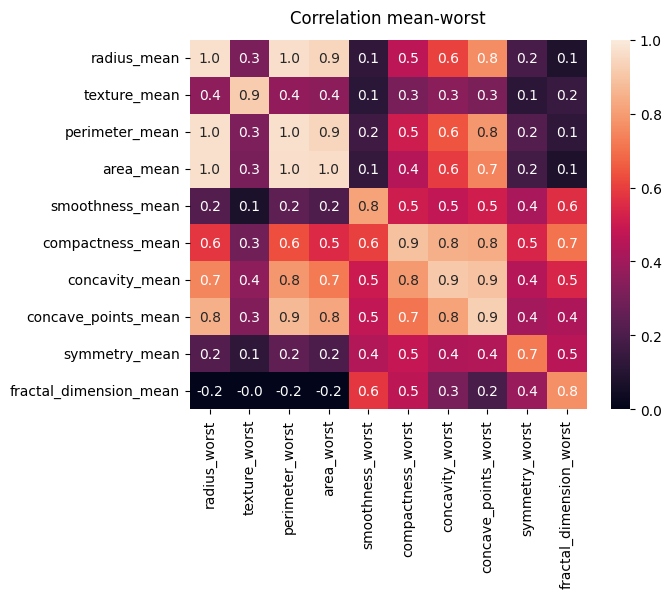

In [571]:
heatmap = sns.heatmap(df.corr().filter(regex=".*mean",axis=0).filter(regex=".*worst",axis=1), xticklabels=True, yticklabels=True, annot=True, fmt='.1f', vmin=0, vmax=1)
heatmap.set_title('Correlation mean-worst', fontdict={'fontsize':12}, pad=12)

Generalno, za svaku pojedinu mjerenu veličinu postoji relativno visoka korelacija među grupama _mean_ i _worst_ (glavna dijagonala).

Text(0.5, 1.0, 'Correlation mean-se')

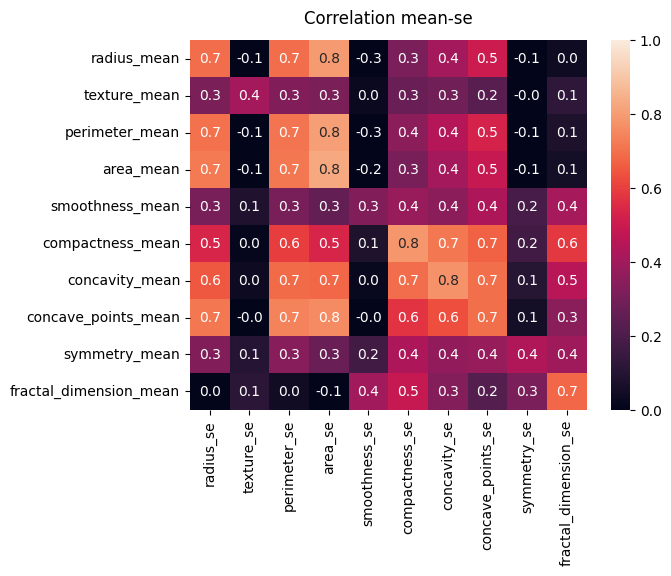

In [572]:
heatmap = sns.heatmap(df.corr().filter(regex=".*mean",axis=0).filter(regex=".*se",axis=1), xticklabels=True, yticklabels=True, annot=True, fmt='.1f', vmin=0, vmax=1)
heatmap.set_title('Correlation mean-se', fontdict={'fontsize':12}, pad=12)

Za većinu veličina (izuzev _texture_, _smoothness_ i _symmetry_) postoji i relativno visoka korelacija među grupama _mean_ i _se_.

Text(0.5, 1.0, 'Correlation se-worst')

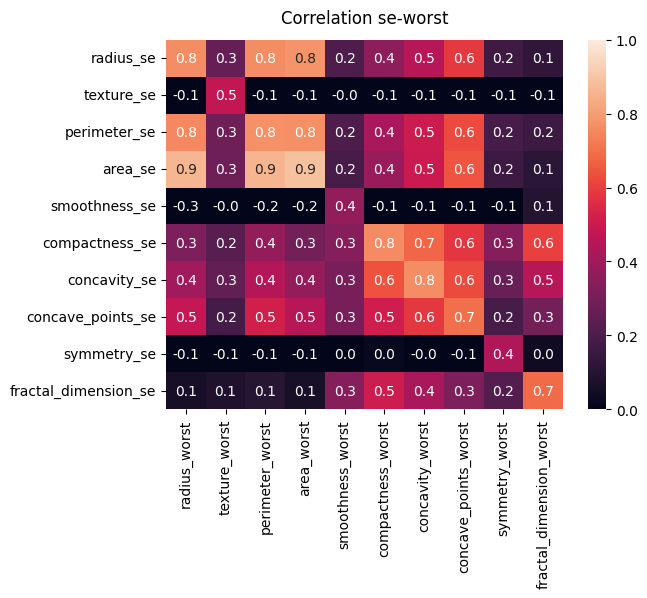

In [573]:
heatmap = sns.heatmap(df.corr().filter(regex=".*se",axis=0).filter(regex=".*worst",axis=1), xticklabels=True, yticklabels=True, annot=True, fmt='.1f', vmin=0, vmax=1)
heatmap.set_title('Correlation se-worst', fontdict={'fontsize':12}, pad=12)

Ponovno, za većinu veličina (izuzev _texture_, _smoothness_ i _symmetry_) postoji i relativno visoka korelacija među grupama _se_ i _worst_.

Daje se zaključiti da su mjerene veličine generalno visoko korelirane s jednakim mjerenim veličinama iz različitih grupa (_mean_, _se_ i _worst_) i da će za tereniranje modela strojnog učenja biti korisno ispitati korištenje samo pojedinih grupa veličina radi smanjenja dimenzionalnosti modela.

### Distribucija atributa
U nastavku ćemo ukratko analizirati distribuciju svakog od atributa, te 2D distribuciju parova atributa. Analizirat ćemo samo grupu _mean_, s obzirom da smo u prošlom poglavlju primijetili generalnu koreliranost istih veličina među skupinama.

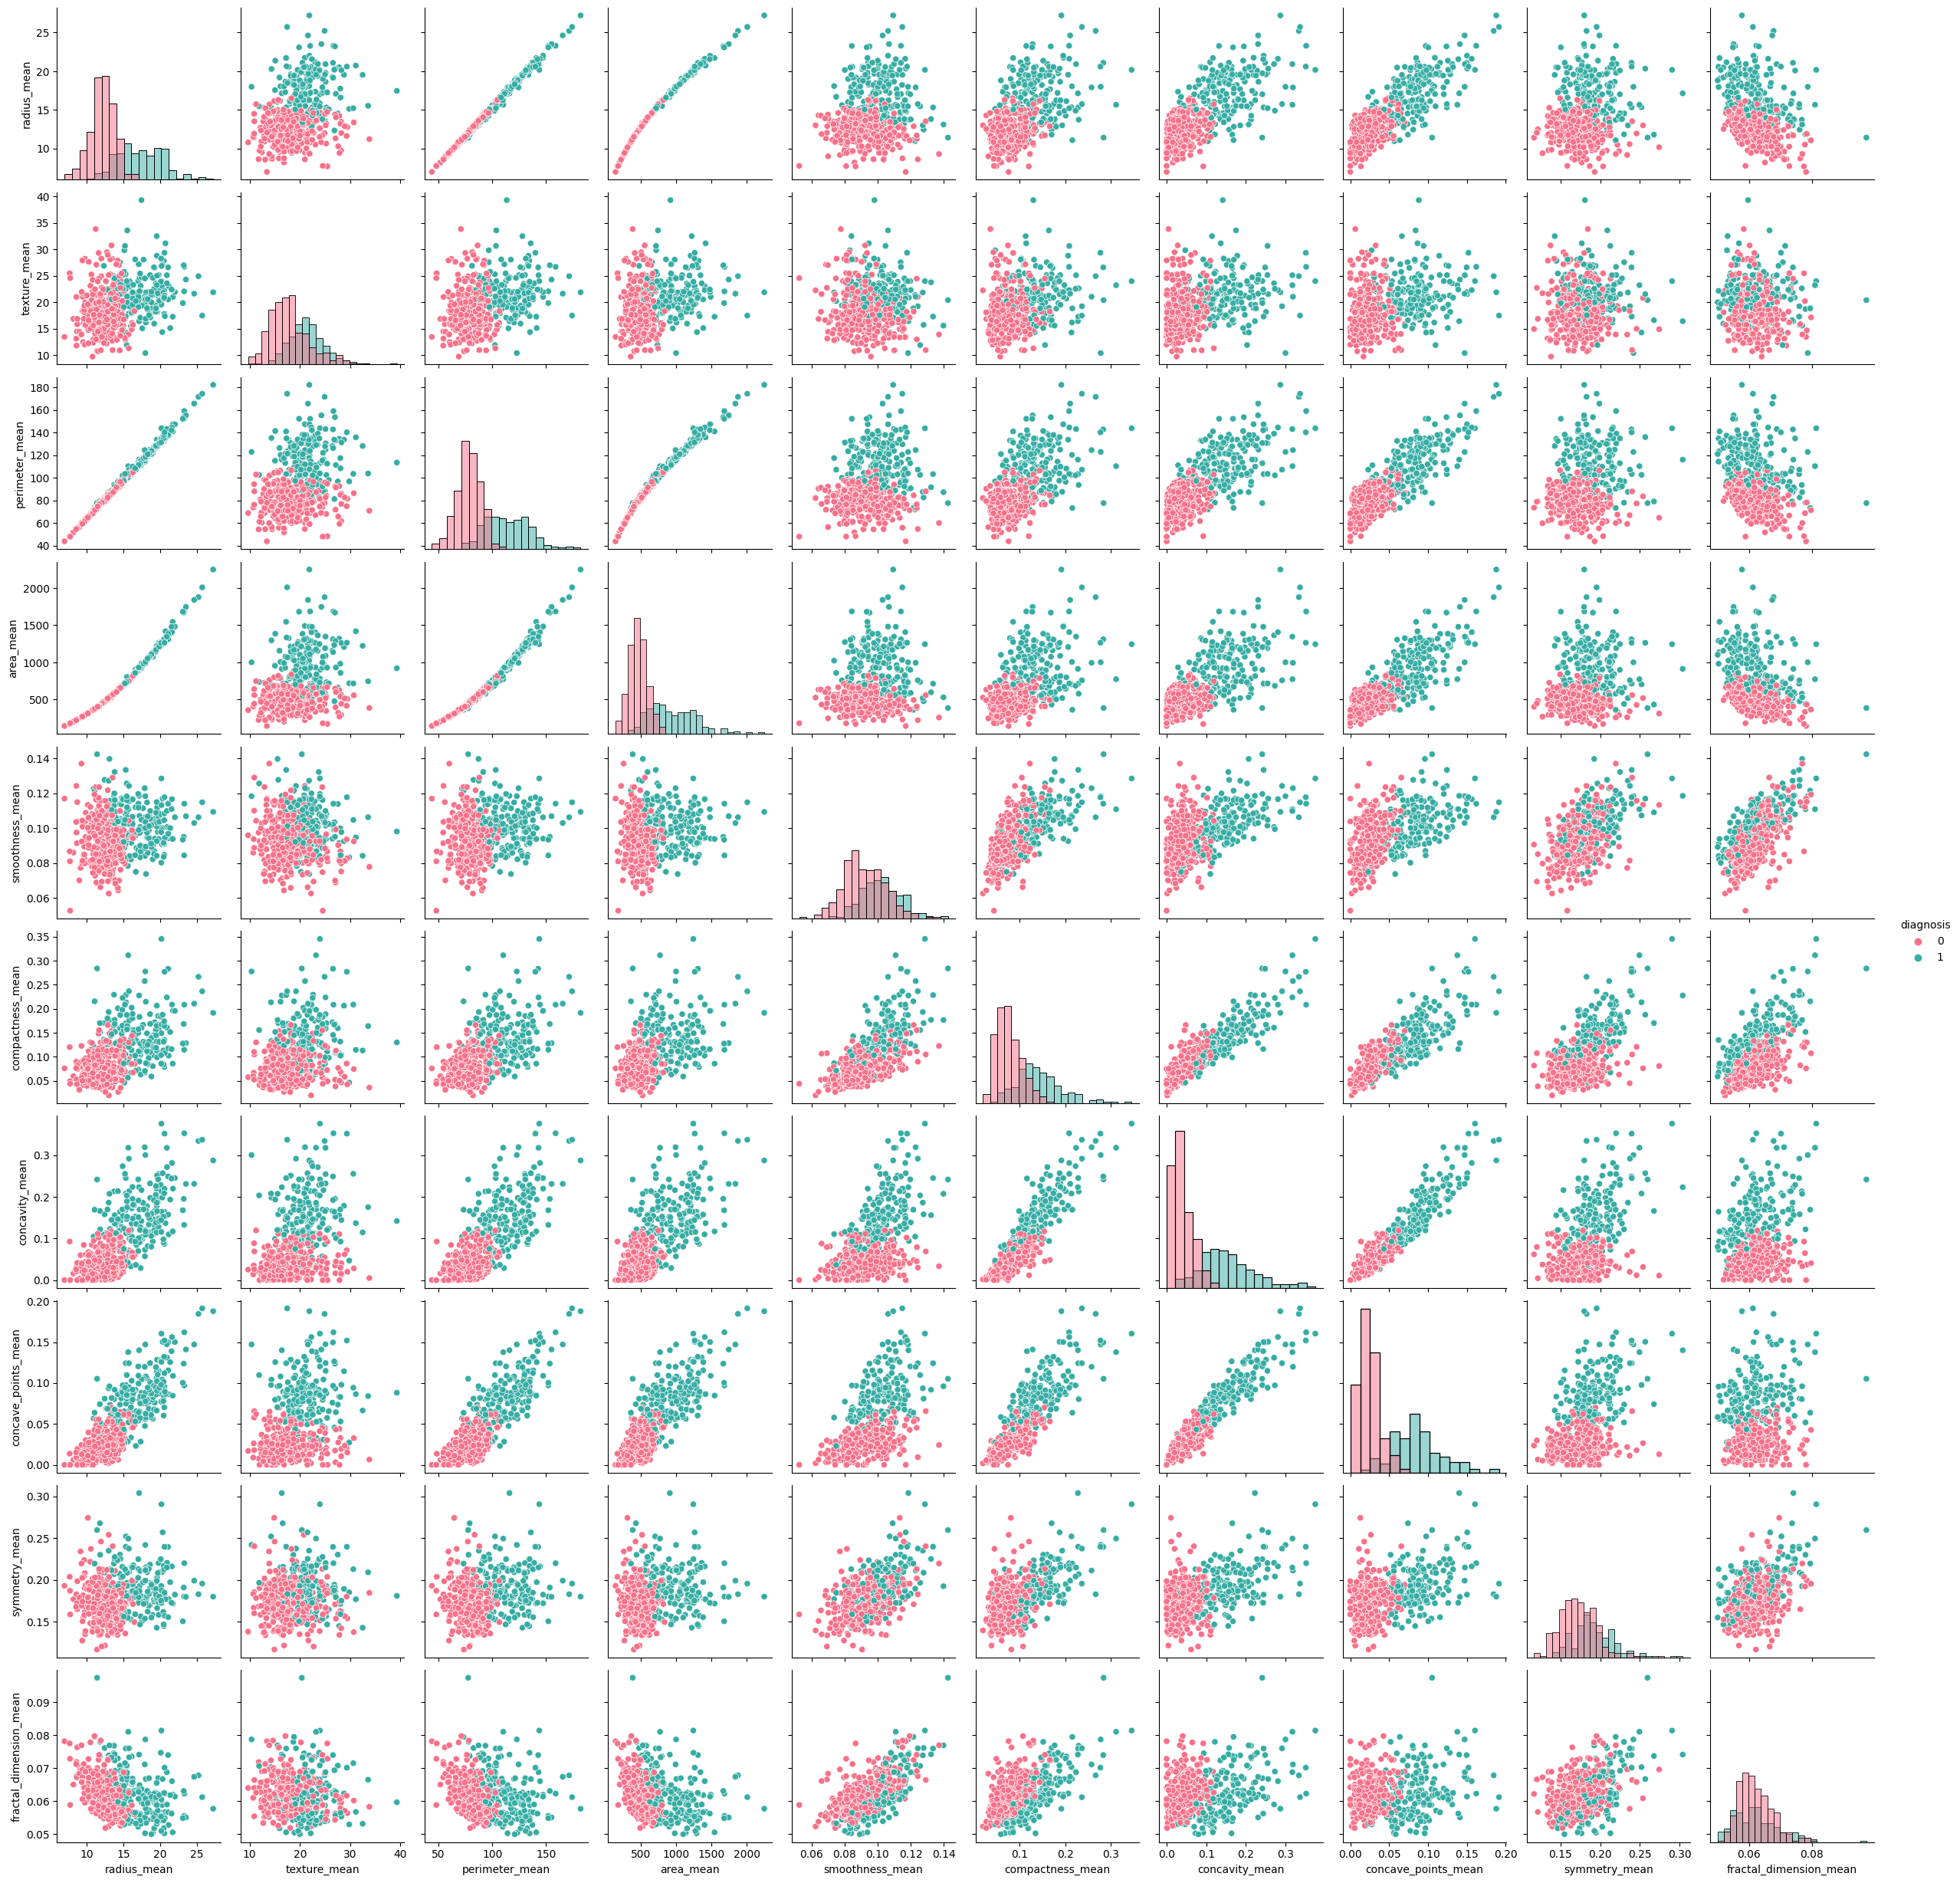

In [574]:
sns.pairplot(df.filter(regex=".*mean|diagnosis", axis=1), hue='diagnosis', diag_kind='hist', palette='husl')

U 2D distribucijama vidimo da upravo značajke koje smo identificirali kao  korelirane u prošlom poglavlju imaju približno linearno distribuirane primjerke. Korelacija se najviše vidi na atributima _radius_, _perimeter_ i _area_, što je očekivano iz već spomenutih razloga. Vidljivo je i da atribut _area_ ima distribuciju u obliku parabole u odnosu na _radius_ i _perimeter_, što je također očekivano, jer površina kruga kvadratno ovisi o radijusu/opsegu.

Ono što možemo vidjeti iz većine 2D distribucija je da su pozitivni i negativni primjerci jasno odvojeni na većem dijelu domene, te da postoji manje preklapanje. To nam daje do znanja da će uzimanje u obzir tih parova atributa vjerojatno biti dobar predviditelj ciljnog razreda (dijagnoza).

Pojedine distribucije atributa (glavna dijagonala) pokazuju uglavnom normalnu razdiobu, češće iskrivljenu prema nižim vrijednostima. Normalna distribucija vidljiva je i gledajući primjerke pojedinih razreda, ali i primjerke oba razreda odjednom.

Neke od atributa sa značajnijim razlikama u distribucijama pozitivnih i negativnih primjeraka prikazat ćemo u nastavku:

In [575]:
df_temp = df.copy()
df_temp["dummy"] = 0

<AxesSubplot: xlabel='dummy', ylabel='area_mean'>

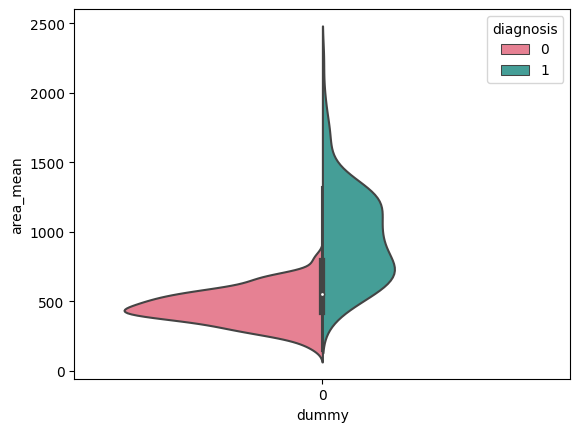

In [576]:
sns.violinplot(df_temp, y='area_mean', split=True, hue="diagnosis", palette='husl', x="dummy")

<AxesSubplot: xlabel='dummy', ylabel='concavity_mean'>

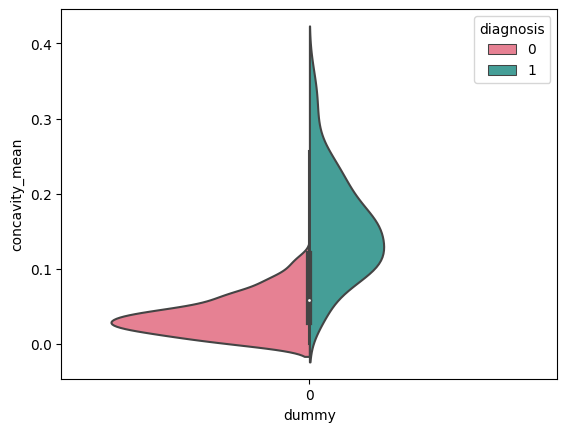

In [577]:
sns.violinplot(df_temp, y='concavity_mean', split=True, hue="diagnosis", palette='husl', x="dummy")

<AxesSubplot: xlabel='dummy', ylabel='concave_points_mean'>

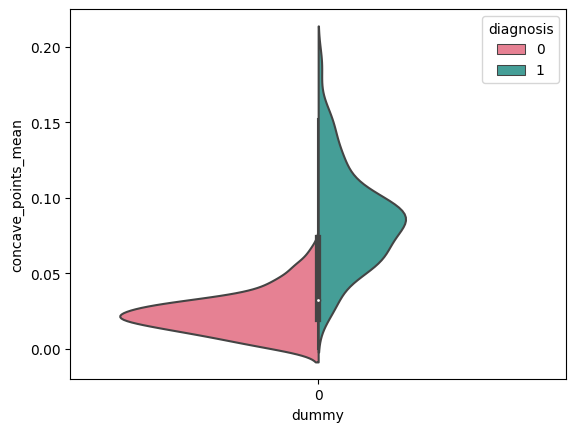

In [578]:
sns.violinplot(df_temp, y='concave_points_mean', split=True, hue="diagnosis", palette='husl', x="dummy")


Vidljivo je da navedeni atributi imaju značajno različitu distribuciju vrijednosti u pozitivnim i negativnim primjercima, stoga će oni sami po sebi vjerojatno biti dobri predviditelji klasifikacije.

Za kraj, počišćeni skup podataka spremamo u datoteku kako bi se mogao koristiti u daljnoj analizi:

In [579]:
# write df to a file
df.to_csv('data_sanitized.csv', index=False)